# High Pass Filter Using the Spectral Inversion Technique

We can also create a high pass filter by using as reference a low pass filter and another technique called **Spectral Inversion**. For this notebook we will use the *Windowed-Sinc Filters* Notebook results, which are pickled in an serialized object called `save_data.pickle`.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

We load the low pass data from the *Windowed-Sinc Filters* Notebook

In [2]:
file = open('save_data.pickle', 'rb')
data = pickle.load(file)
file.close()
#data.keys()

ecg = np.array(data['ecg'])
low_pass = np.array(data['low_pass'])
low_pass = low_pass/np.sum(low_pass)
fft_low_pass = np.array(data['fft_low_pass'])

To generate the high pass filter, we use the Sprectral Inversion methond, which consist of multiplying the low pass filter response $h_{lp}[n]$ with $-1$ and then add $1$ to the center value. Therefore the high pass filter response is given by:
$$h_{hp}[n] = \delta[n] -h_{lp}[n]$$

In [3]:
high_pass = -low_pass
center = int(len(high_pass)/2)
high_pass[center] = high_pass[center]+1

fft_high_pass_response= np.fft.fft(high_pass)
fft_high_pass = np.absolute(fft_high_pass_response)/np.sum(np.absolute(fft_high_pass_response))

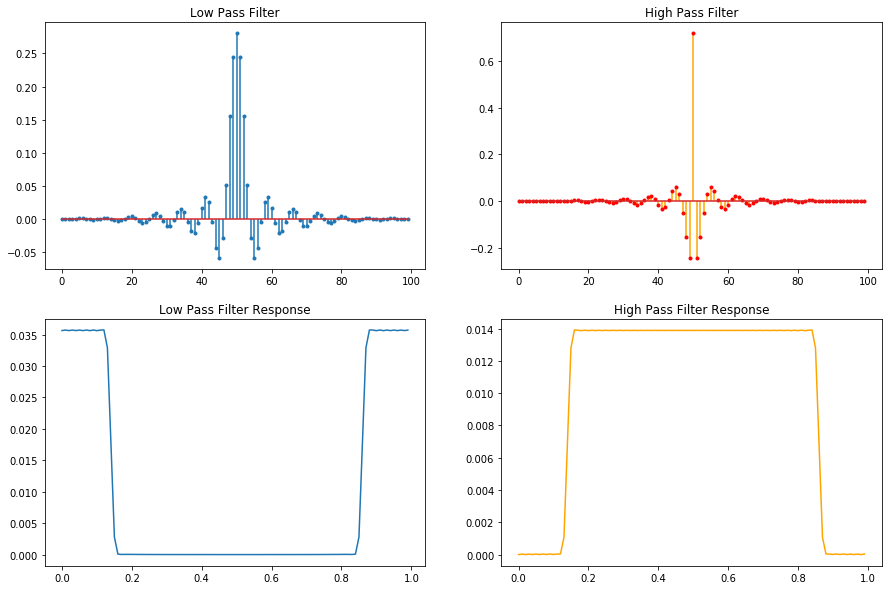

In [4]:
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2,2,1)
plt.stem(low_pass, markerfmt='.', use_line_collection=True)
plt.title('Low Pass Filter')

plt.subplot(2,2,2)
plt.stem(high_pass, linefmt='orange', markerfmt='r.', use_line_collection=True)
plt.title('High Pass Filter')

plt.subplot(2,2,3)
plt.plot(np.arange(len(fft_low_pass))/len(fft_low_pass), fft_low_pass)
#plt.stem(np.arange(len(fft_low_pass))/len(fft_low_pass), fft_low_pass, markerfmt='.', use_line_collection=True)
plt.title('Low Pass Filter Response')


plt.subplot(2,2,4)
plt.plot(np.arange(len(fft_high_pass))/len(fft_high_pass), fft_high_pass, color='orange')
#plt.stem(np.arange(len(fft_high_pass))/len(fft_high_pass), fft_high_pass, linefmt='orange', markerfmt='r.', use_line_collection=True)
plt.title('High Pass Filter Response');

**This frequency response is a “upside down” version of the frequency response of the low-pass filter.**

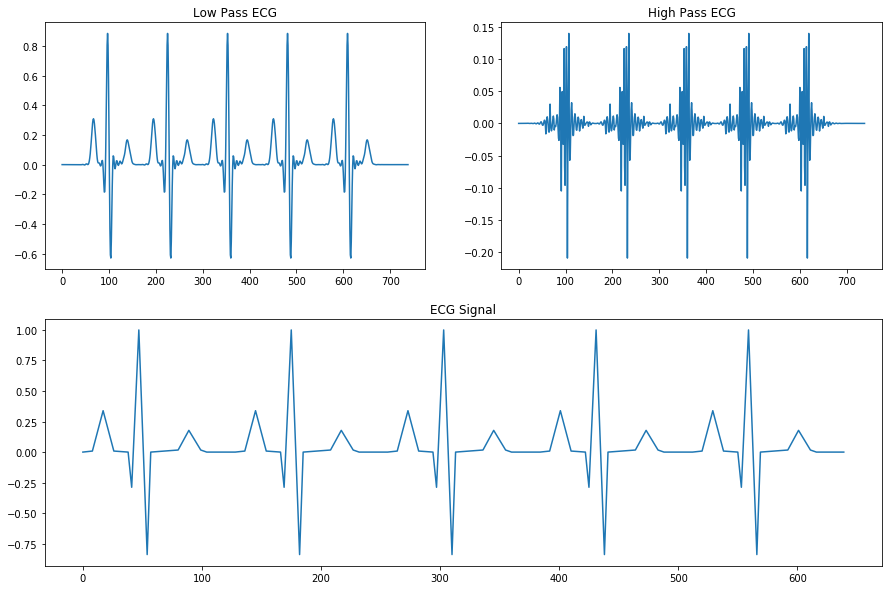

In [5]:
low_pass_ecg = np.convolve(ecg,low_pass)
high_pass_ecg = np.convolve(ecg,high_pass)


plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2,2,1)
plt.plot(low_pass_ecg)
plt.title('Low Pass ECG')

plt.subplot(2,2,2)
plt.plot(high_pass_ecg)
plt.title('High Pass ECG')

plt.subplot(2,1,2)
plt.plot(ecg)
plt.title('ECG Signal');

## Why Does Spectral Inversion Work?

Spectral inversion is based on the following idea. A low-pass filter generates a signal with the high frequencies removed. Hence, if you subtract this signal from the original one, you have exactly the high frequencies. This means that you can implement a high-pass filter in two steps. First, you compute

$$x_\mathrm{lpf}[n]=x[n]*h_\mathrm{lpf}[n]$$

where $x[n]$ is the original signal, $h_{lpf}[n]$ is the low-pass filter, and $x_{lpf}[n]$ is the low-pass-filtered signal. The asterisk represents convolution. Second, you compute

$$x_\mathrm{hpf}[n]=x[n]-x_\mathrm{lpf}[n]$$

where $x_{hpf}[n]$ is the high-pass-filtered signal.

The alternative is to adapt the filter through spectral inversion. To show that spectral inversion has exactly the same result, first note that $x[n]=x[n]*\delta[n]$, where $\delta[n]$ is a simple impulse, as defined in Impulse Response. You can then write

$$x_\mathrm{hpf}[n]=x[n]-x_\mathrm{lpf}[n]=x[n]*\delta[n]-x[n]*h_\mathrm{lpf}[n]=x[n]*(\delta[n]-h_\mathrm{lpf}[n])$$

where the last step follows from the distributive property of convolution. This means that the required high-pass filter is

$$h_\mathrm{hpf}[n]=\delta[n]-h_\mathrm{lpf}[n]$$

which is exactly the procedure that I’ve described before.

#### Reference:
[1] https://tomroelandts.com/articles/how-to-create-a-simple-high-pass-filter